Description:
This Jupyter Notebook analyzes 19F nuclear magnetic resonance spectroscopy (NMR) data, focusing on plotting the fluoride peak over time, calculating the integral, and fitting the values using a convolution model.

Data Source:
Before running the notebook, download the required data from Zenodo. The data, in .ft2 format, feature filenames indicating the elapsed time since incubation (in hours) and the buffer type (e.g., '2_17_PBS.ft2' indicates 2 hours and 17 minutes, PBS buffer).

Output:
Results are saved as an .svg file in the Results/ directory.


In [1]:
# Import useful stuff
%matplotlib inline
import os, sys
import nmrglue as ng
import numpy as np
import glob
import json
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import subplots
from scipy.optimize import curve_fit
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # Import r2_score from scikit-learn
import matplotlib.ticker as ticker  # Import the ticker module
from fit_raw import * # the included fit_raw.py file contains some useful functions

In [2]:
# Create an instance of the fit_raw class
fit_1D_19F = fit_raw()

# Read and process the data
dic, data = fit_1D_19F.read_data('Timecourse_19F_1D_spectra')

# Create a dictionary to group data by time
group_dict = {}

for key in data.keys():
    # Extract the time value from the filename and add to group_dict
    time = float('.'.join(key.split("_")[-2:]))
    if time not in group_dict:
        group_dict[time] = []
    group_dict[time].append(key)

# Sort the keys in ascending order
sorted_keys = sorted(group_dict.keys())

# Initialize variables to store all spectra
all_spectra = []

# Loop over grouped data chronologically, collect spectra
for i, prefix in enumerate(sorted_keys):
    keys = group_dict[prefix]
    spectra = []
    for key in keys:
        spectrum = data[key]
        spectra.append(spectrum)

    # Get the x-axis values (ppm_real)
    udic = ng.pipe.guess_udic(dic[keys[0]], data[keys[0]])
    ppm_real = np.linspace(-120 + -(udic[0]['sw'] / udic[0]['obs']) / 2, -120 + (udic[0]['sw'] / udic[0]['obs']) / 2, num=data[keys[0]].shape[0])
                                        
    # Append the spectrum to the list of all spectra
    all_spectra.append((ppm_real, np.mean(spectra, axis=0), np.std(spectra, axis=0) / np.sqrt(len(spectra)), prefix))


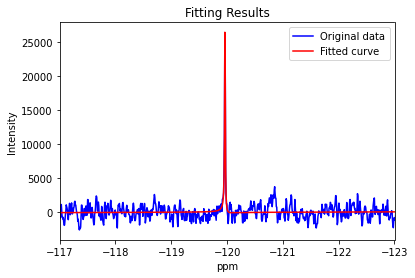

Time(h): 1.0, Integral: 82489.86848409713


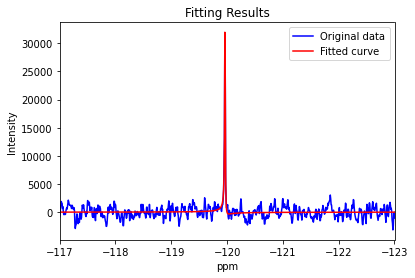

Time(h): 2.73, Integral: 97037.10050213999


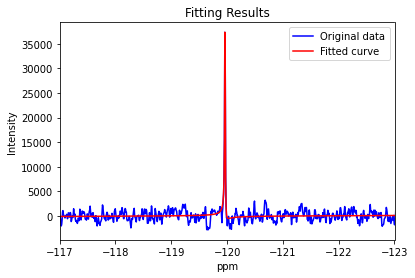

Time(h): 3.15, Integral: 115053.36611477217


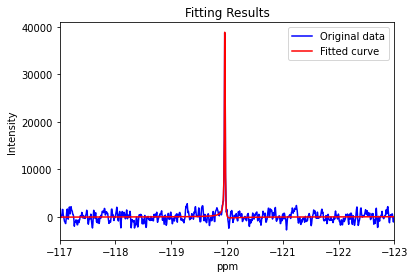

Time(h): 4.22, Integral: 121868.93621923542


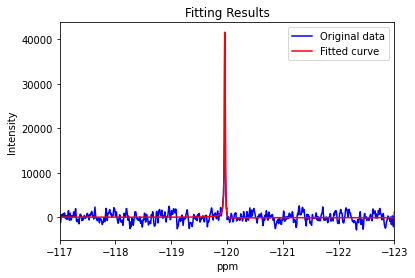

Time(h): 5.29, Integral: 133421.2958278201


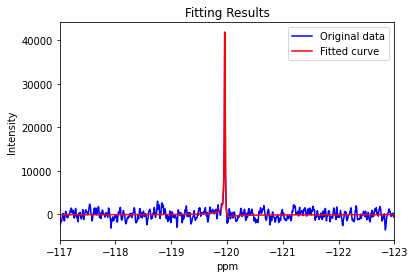

Time(h): 6.36, Integral: 132711.9155189442


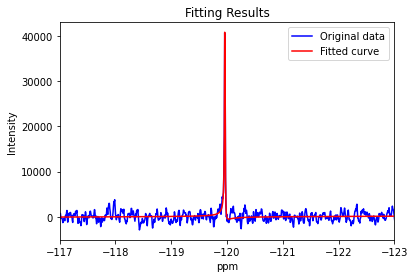

Time(h): 7.44, Integral: 131232.14293935758


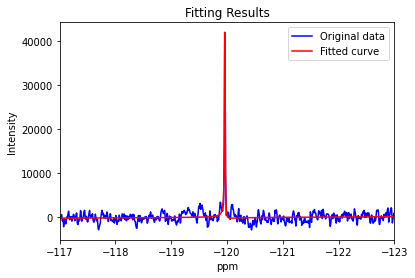

Time(h): 8.51, Integral: 130139.24158738257


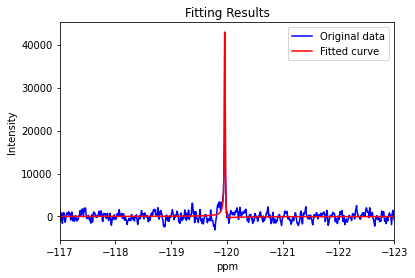

Time(h): 9.58, Integral: 138910.0977434738


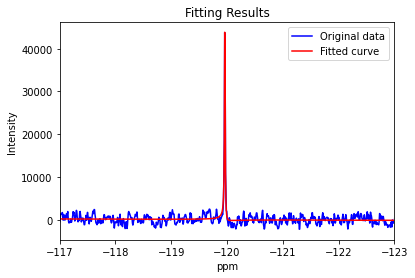

Time(h): 10.66, Integral: 141370.2060150249


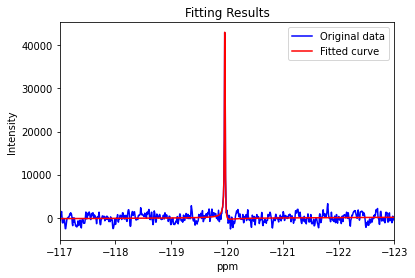

Time(h): 11.73, Integral: 134713.14973911378


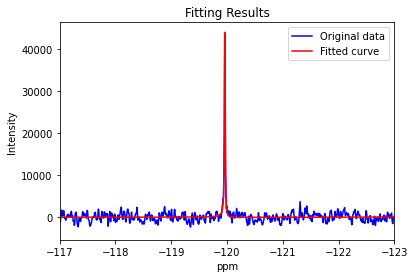

Time(h): 12.8, Integral: 142584.25689194052


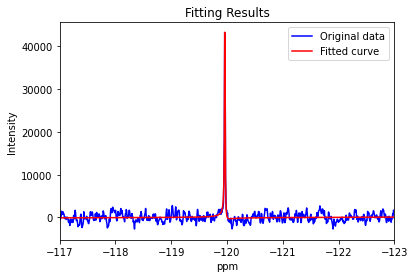

Time(h): 13.88, Integral: 134961.37514954995


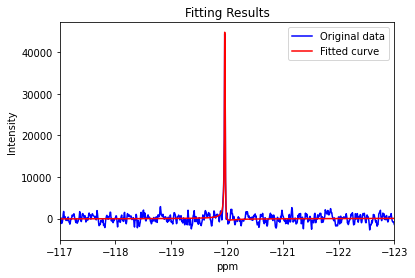

Time(h): 14.95, Integral: 139711.47756068682


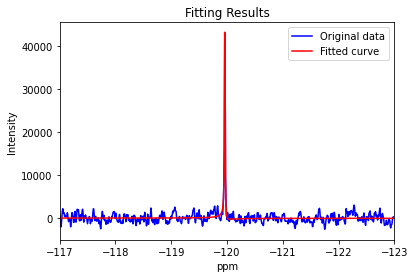

Time(h): 16.21, Integral: 132273.99453095978


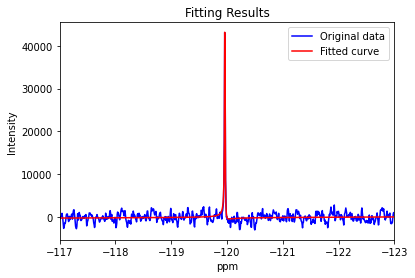

Time(h): 17.94, Integral: 129042.12328011621


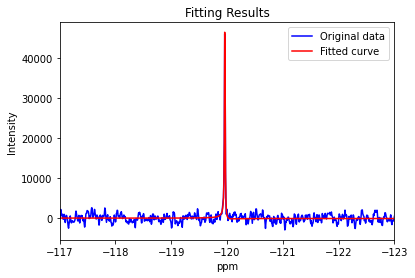

Time(h): 18.17, Integral: 145143.45427090698


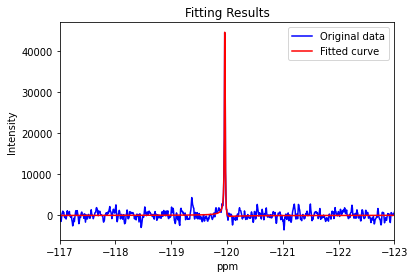

Time(h): 19.24, Integral: 143818.77976152592


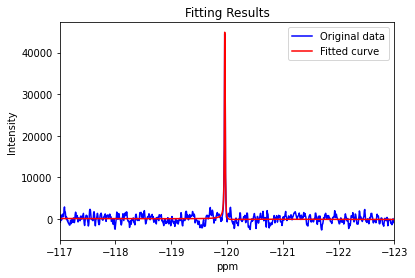

Time(h): 20.31, Integral: 137399.9052861456


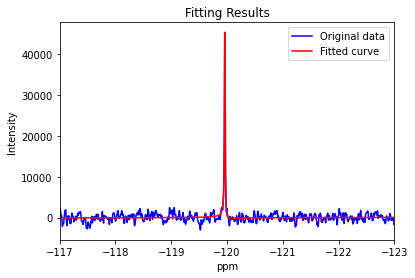

Time(h): 21.39, Integral: 143213.2481104231


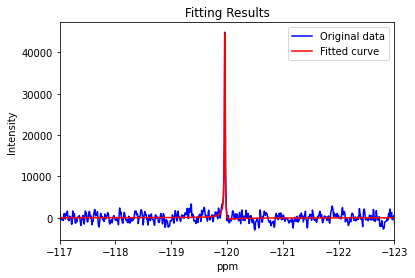

Time(h): 22.46, Integral: 146624.8924231297


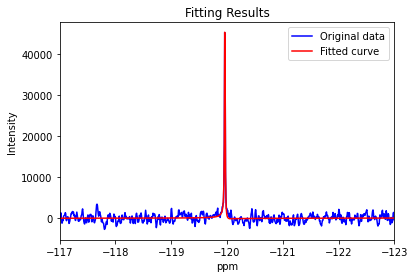

Time(h): 23.53, Integral: 143216.10047754762


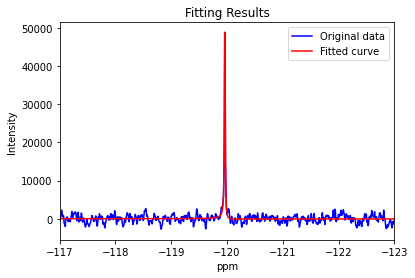

Time(h): 24.6, Integral: 165700.60746611352


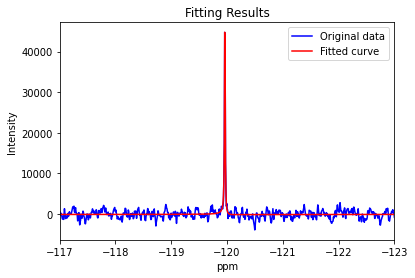

Time(h): 25.68, Integral: 144397.64958229038


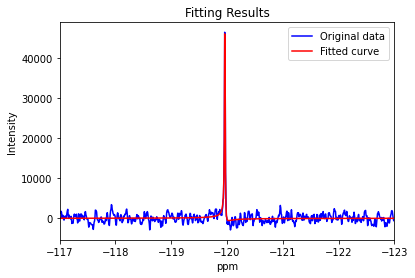

Time(h): 26.75, Integral: 150524.7297544127


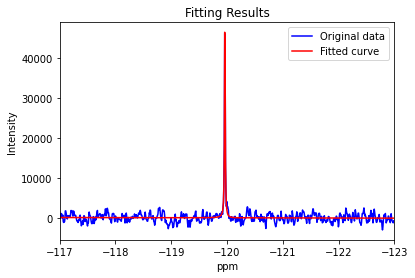

Time(h): 27.82, Integral: 150101.95567917093


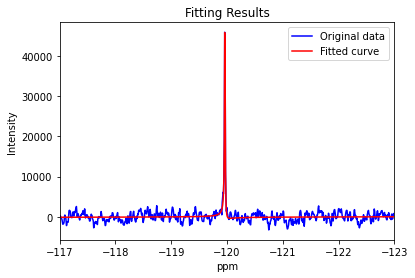

Time(h): 28.9, Integral: 148696.46702086003


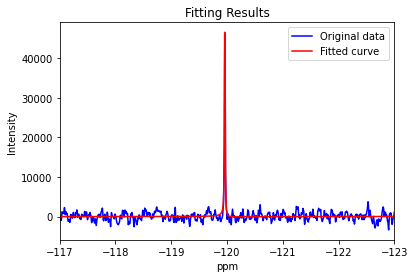

Time(h): 29.97, Integral: 141353.340499461


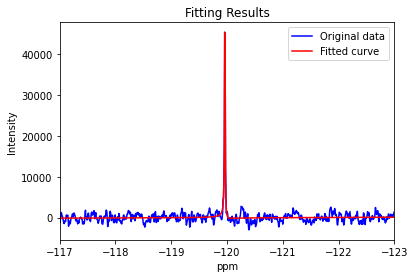

Time(h): 31.42, Integral: 145138.96644344617


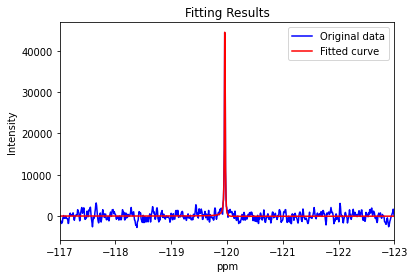

Time(h): 32.12, Integral: 140768.69673532303


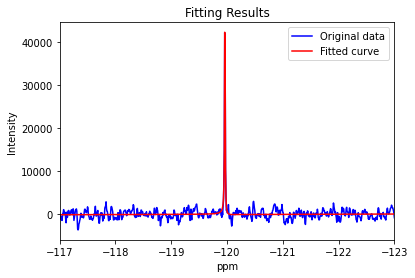

Time(h): 33.19, Integral: 129931.96502107197


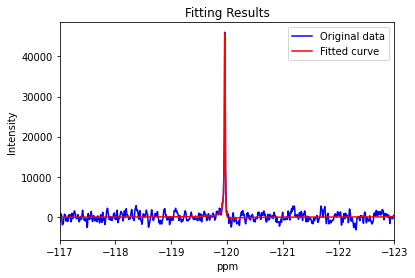

Time(h): 34.26, Integral: 152770.97089930388


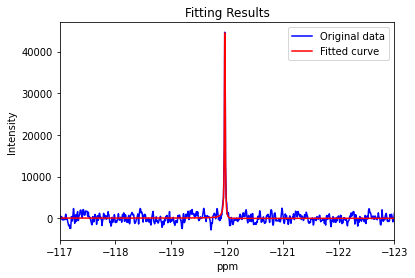

Time(h): 35.33, Integral: 150663.2012745892


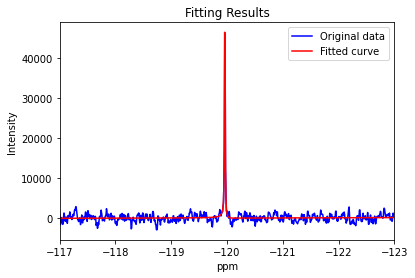

Time(h): 36.41, Integral: 147346.13580767598


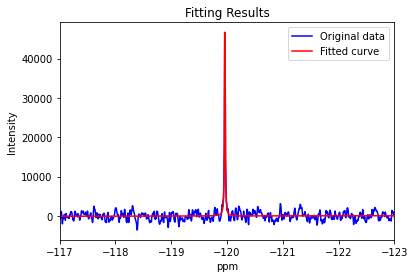

Time(h): 37.48, Integral: 154575.94182843727


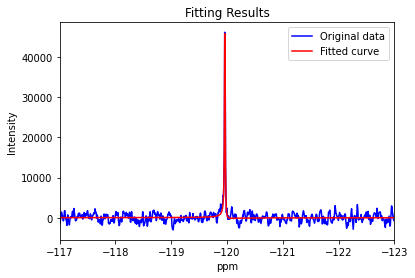

Time(h): 38.55, Integral: 151663.66674522852


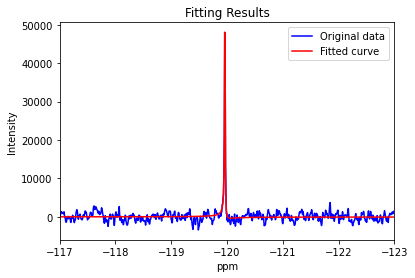

Time(h): 39.63, Integral: 160605.81034081333


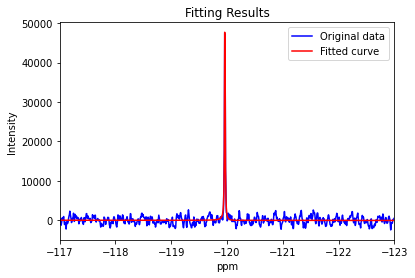

Time(h): 40.7, Integral: 149486.7228745076


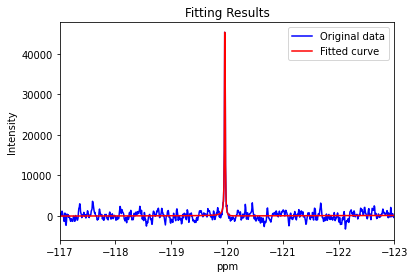

Time(h): 41.77, Integral: 143840.91478924674


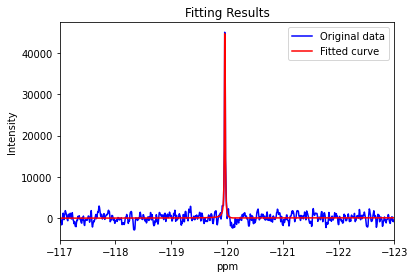

Time(h): 42.84, Integral: 150481.79921769307


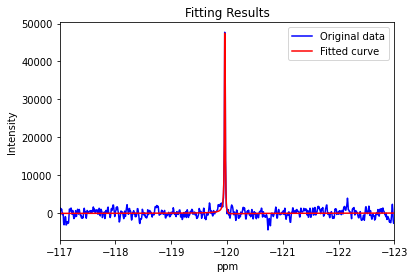

Time(h): 43.92, Integral: 157074.00386369426


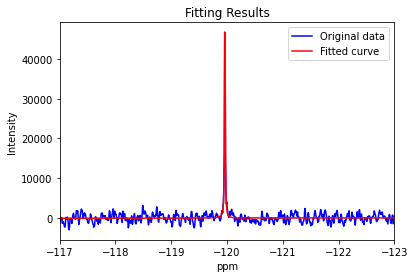

Time(h): 44.99, Integral: 154833.04658468856


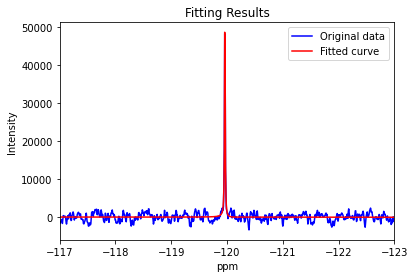

Time(h): 46.64, Integral: 151208.05773491782


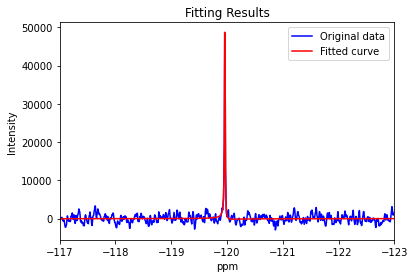

Time(h): 47.14, Integral: 157083.22861061123


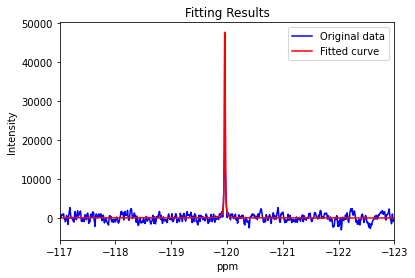

Time(h): 48.21, Integral: 148602.97826130476


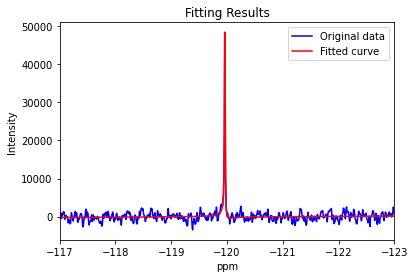

Time(h): 49.28, Integral: 155076.93188796248


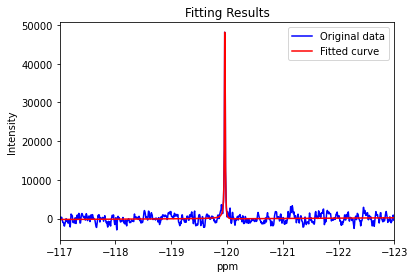

Time(h): 50.36, Integral: 154814.16757686416


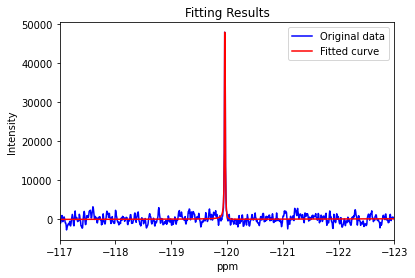

Time(h): 51.43, Integral: 151876.04395170303


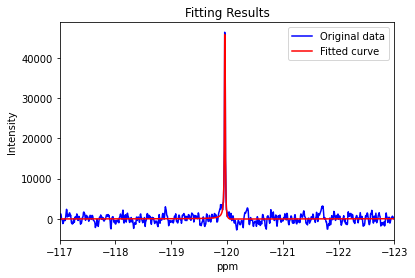

Time(h): 52.5, Integral: 158176.81202066035


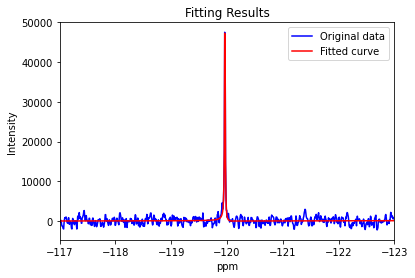

Time(h): 53.57, Integral: 160384.68614033246


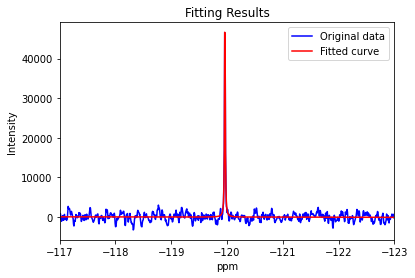

Time(h): 54.65, Integral: 156843.69658216057


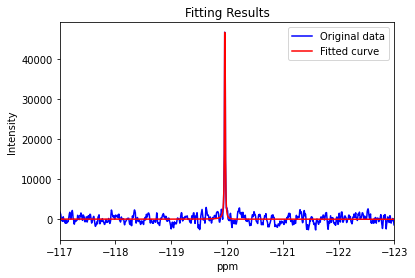

Time(h): 55.72, Integral: 154359.98599221994


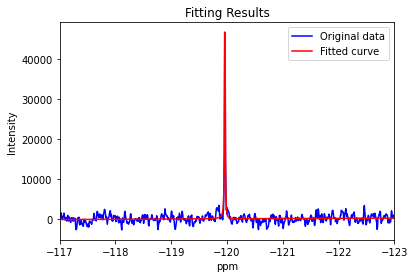

Time(h): 56.79, Integral: 150645.8952545291


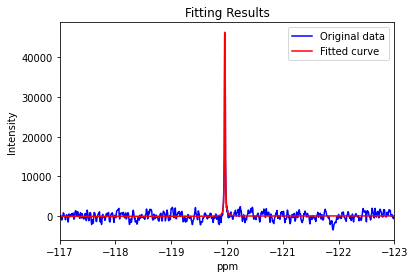

Time(h): 57.87, Integral: 147114.71804355117


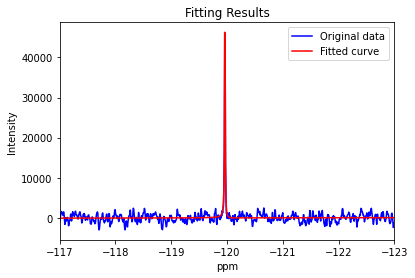

Time(h): 58.94, Integral: 148294.12962676006


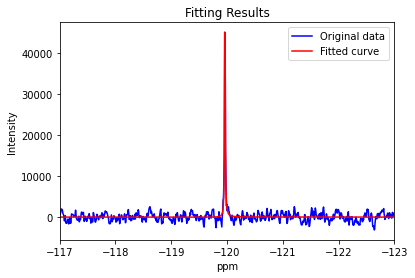

Time(h): 60.12, Integral: 153138.25647788358


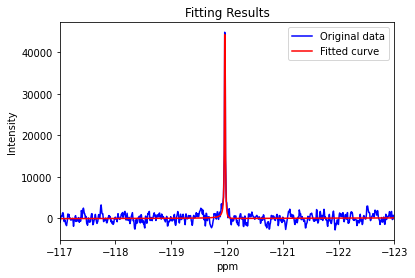

Time(h): 61.85, Integral: 157332.32684508167


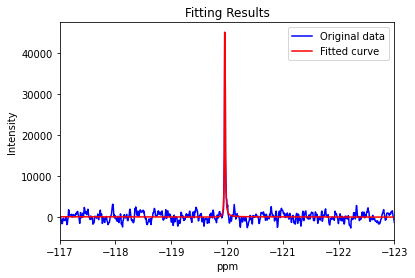

Time(h): 62.16, Integral: 147180.59144338907


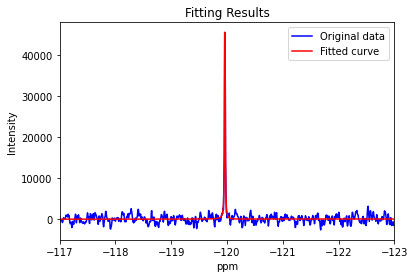

Time(h): 63.23, Integral: 148133.51072737572


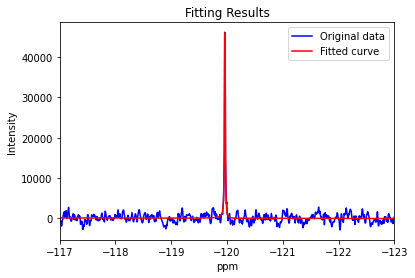

Time(h): 64.3, Integral: 155900.2267925388


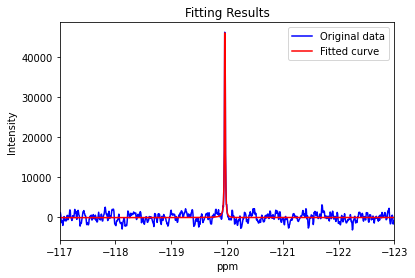

Time(h): 65.38, Integral: 155533.57943912834


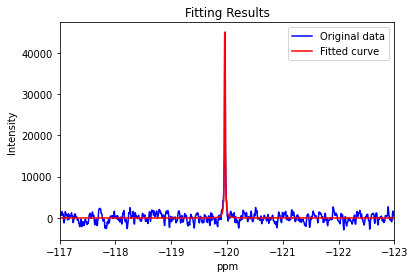

Time(h): 66.45, Integral: 153725.39211379312


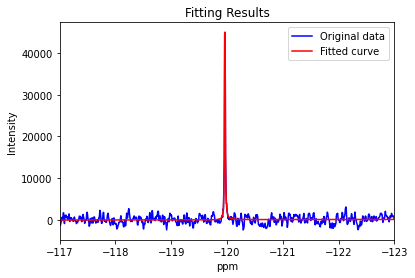

Time(h): 67.52, Integral: 150693.3353935347


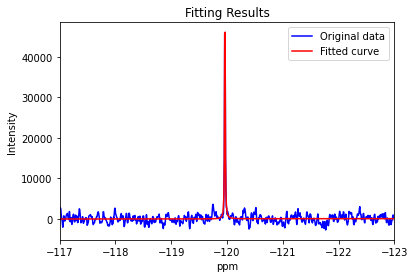

Time(h): 68.6, Integral: 148719.14340085755


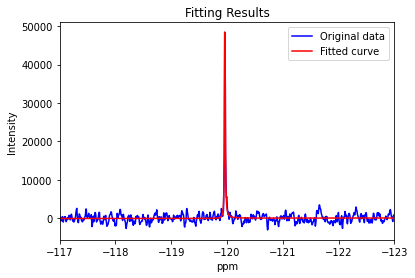

Time(h): 69.67, Integral: 163693.7812565694


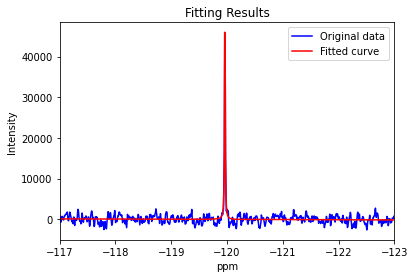

Time(h): 70.74, Integral: 151566.17167294121


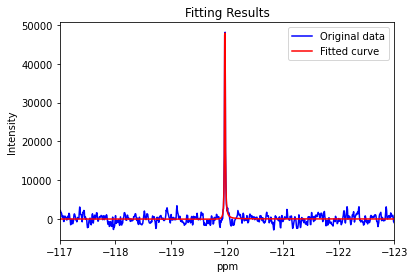

Time(h): 71.82, Integral: 161785.73898312566


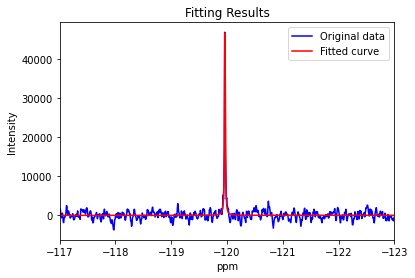

Time(h): 72.89, Integral: 161542.35492723895


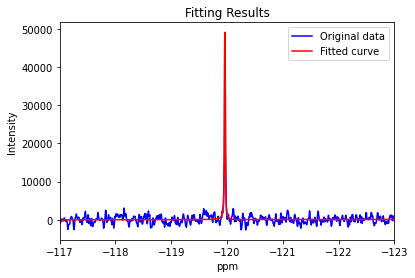

Time(h): 73.96, Integral: 165143.87888458837


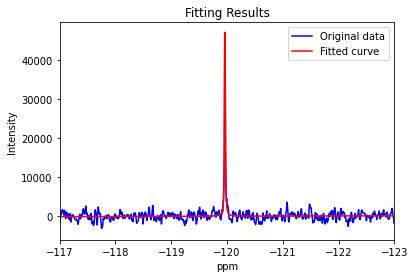

Time(h): 75.34, Integral: 161256.3068493363


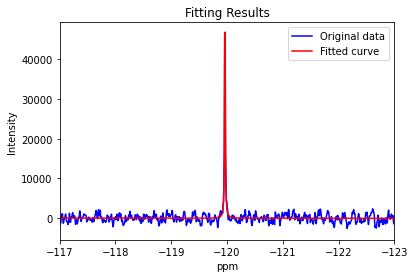

Time(h): 76.11, Integral: 161059.2667913989


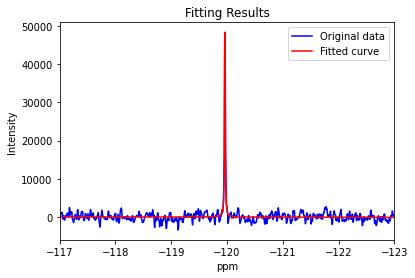

Time(h): 77.18, Integral: 162562.54681216046


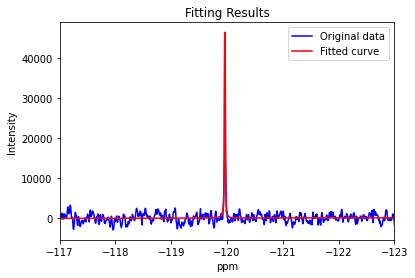

Time(h): 78.25, Integral: 152135.11809676656


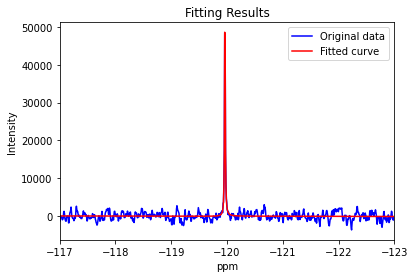

Time(h): 79.33, Integral: 164440.26453466248


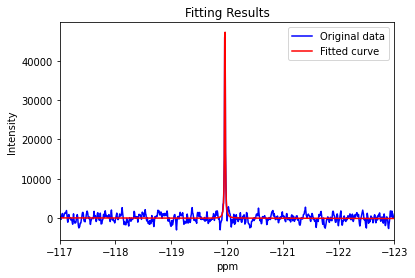

Time(h): 80.4, Integral: 156982.4428657299


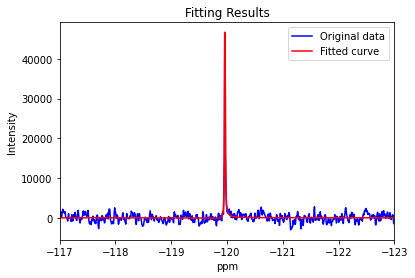

Time(h): 81.47, Integral: 150520.00641195435


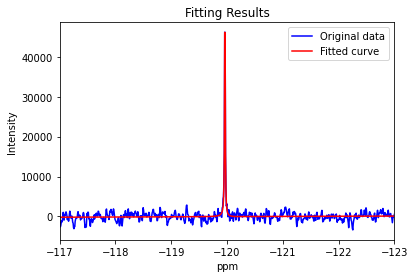

Time(h): 82.54, Integral: 156330.59364891818


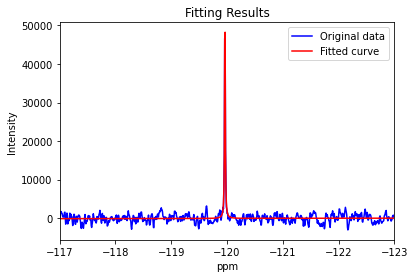

Time(h): 83.62, Integral: 161668.52715324593


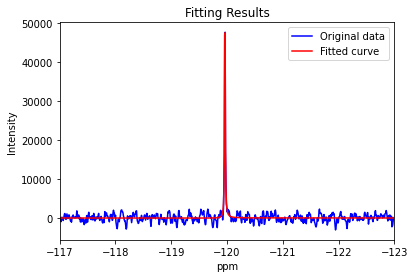

Time(h): 84.69, Integral: 160296.11755050186


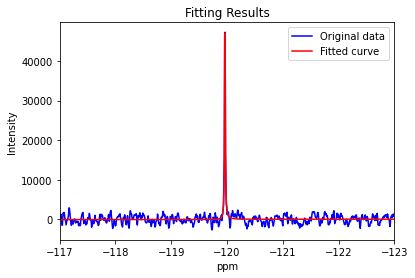

Time(h): 85.76, Integral: 157961.56201025058


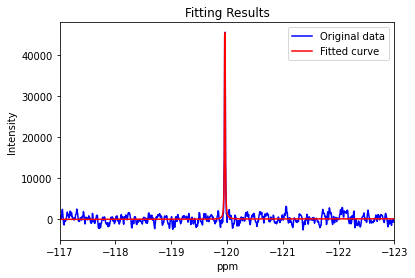

Time(h): 86.84, Integral: 144648.40204896484


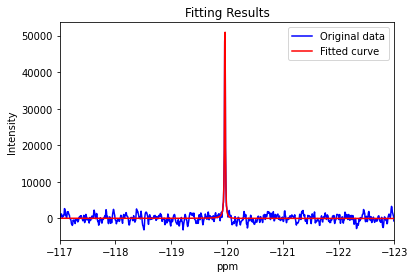

Time(h): 87.91, Integral: 176637.46441298956


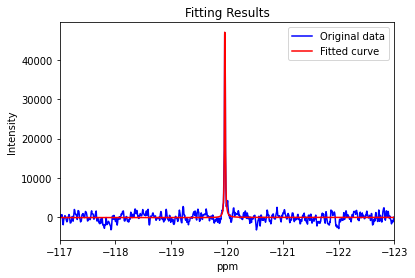

Time(h): 88.98, Integral: 160821.65875010352


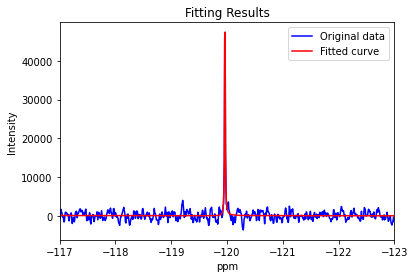

Time(h): 90.56, Integral: 152615.8774412712


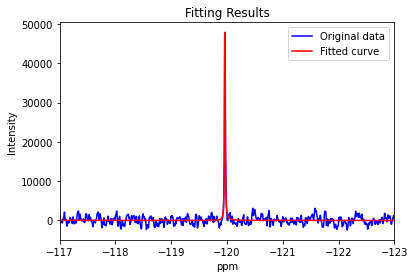

Time(h): 91.13, Integral: 157396.62681713386


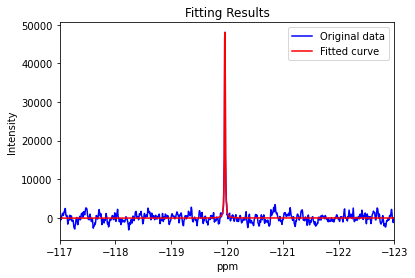

Time(h): 92.2, Integral: 158396.2586745616
86
86


In [3]:
# Fit the spectra to a Lorentzian fit and determine the integral between a defined range
# Define the ppm range you want to integrate within
ppm_range_start = -120  # Replace with your desired start ppm
ppm_range_end = -119.9  # Replace with your desired end ppm

# Create an instance of the fit_raw class
fit_obj = fit_raw()

# Create dictionaries to store vals and integrals by time
time_f0s_av = {}
time_f0s_se = {}
time_integrals = {}  # Dictionary to store integrals

# Loop over grouped data, calculate average, standard error, and integrals
for key in sorted_keys:
    # Calculate average and standard error for chemical shifts (f0)
    f0_vals = []
    f0_errs = []

    # Initialize a list to store integrals for this concentration
    integrals = []

    for i in group_dict[key]:
        popt, perr, fit_curve = fit_obj.fit_1D(dic=dic[i], data=data[i])
        f0_vals.append(popt[0])
        f0_errs.append(perr[0])

        # Find the indices of ppm values within the specified ppm range
        low_value_index = np.argmin(np.abs(ppm_real - ppm_range_start))
        high_value_index = np.argmin(np.abs(ppm_real - ppm_range_end))

        # Calculate the integral within the specified ppm range
        integral = np.trapz(fit_curve[low_value_index:high_value_index + 1])
        integrals.append(integral)
        
        # Print time and integral details after each curve
        print(f"Time(h): {key}, Integral: {integral}")

    # Calculate the mean and standard error of chemical shifts (f0)
    time_f0s_av[key] = np.mean(f0_vals, axis=0)
    time_f0s_se[key] = np.sqrt(np.sum(np.asarray(f0_errs) ** 2) / 3)

    # Store the integrals for this concentration in the dictionary
    time_integrals[key] = integrals

# Extract integral values for timecourse plot
time_labels = list(time_integrals.keys())
integral_values = [time_integrals[key] for key in time_labels]

# Compile x-values for timecourse plot 
x_values = [key for key in time_labels]
print(len(x_values))
print(len(integral_values))



Optimised Parameters: A=0.31, B=0.20, C=0.48, k1=0.02, k2=0.43


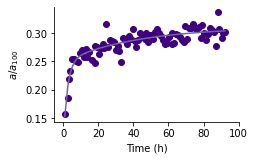

In [4]:
# Plot the integral values and perform a fitting using a convolution model
# Flatten the list of lists into a 1D list
integral_values = [value[0] if isinstance(value, list) else value for value in integral_values]

# Calculate the maximum value in the integral_values
max_integral_value = 523990.75889637566

# Normalize the integral values
normalized_integral_values = [value / max_integral_value for value in integral_values]

# Sort the data by x values in ascending order
sorted_data = sorted(zip(x_values, normalized_integral_values), key=lambda x: x[0])
x_values, normalized_integral_values = zip(*sorted_data)

# Create a scatter plot
plt.figure(figsize=(3.307, 2.12))

# Transform x-values (time) using logarithm
x_log = np.log(x_values)

# Get the current Axes instance
ax = plt.gca()

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis labels
plt.xlabel('Time (h)')
ax.set_xlim(-5, 100)
plt.ylabel(r'$a/a_{100}$')

# Fit the curve to the data
def conv_fit(t, A, B, C, k1, k2):
    return A * (1 - B * np.exp(-k1 * np.array(t)) - C * np.exp(-k2 * np.array(t)))

# Fit the curve to the data with bounds and method specified
upper_bound_A = 1.0
popt, pcov = curve_fit(conv_fit, x_values, normalized_integral_values, method='trf', bounds=([0, 0, 0, 0, 0], [upper_bound_A, np.inf, np.inf, np.inf, np.inf]))

# Extract the optimized parameters
A_opt, B_opt, C_opt, k1_opt, k2_opt = popt

# Print the optimised parameters
print(f'Optimised Parameters: A={A_opt:.2f}, B={B_opt:.2f}, C={C_opt:.2f}, k1={k1_opt:.2f}, k2={k2_opt:.2f}')

# Generate the fitted curve using the optimized parameters
fitted_curve = conv_fit(x_values, A_opt, B_opt, C_opt, k1_opt, k2_opt)

# Calculate R-squared for the fitted curve
r2_conv_fit = r2_score(normalized_integral_values, fitted_curve)

dark_purple = plt.cm.Purples(1.0)
light_purple = plt.cm.Purples(0.7)

# Plot the best-fit convoluted model
plt.plot(x_values, fitted_curve, color=light_purple)

# Now, you can plot the scatter points
plt.scatter(x_values, normalized_integral_values, color=dark_purple)

# setting fonts
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

plt.savefig("Results/timecourse_PBS_100uMnormalise.svg", transparent=True, bbox_inches='tight', dpi=1200)
plt.show()
